# Gammas with Timing Information

In [1]:
### initializations and import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
%pylab inline

from CGMFtk import histories as fh

Populating the interactive namespace from numpy and matplotlib


In [2]:
### rcParams are the default parameters for matplotlib
import matplotlib as mpl

print ("Matplotbib Version: ", mpl.__version__)

mpl.rcParams['font.size'] = 18
mpl.rcParams['font.family'] = 'Helvetica', 'serif'
#mpl.rcParams['font.color'] = 'darkred'
mpl.rcParams['font.weight'] = 'normal'

mpl.rcParams['axes.labelsize'] = 18.
mpl.rcParams['xtick.labelsize'] = 18.
mpl.rcParams['ytick.labelsize'] = 18.
mpl.rcParams['lines.linewidth'] = 2.

font = {'family' : 'serif',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 18,
        }

mpl.rcParams['xtick.major.pad']='10'
mpl.rcParams['ytick.major.pad']='10'

mpl.rcParams['image.cmap'] = 'inferno'

Matplotbib Version:  3.1.3


This time, **CGMF** was run with the option `-t -1` to record all of the $\gamma$-ray timing information.  **CGMFtk** can read these files as well, based on the information that appears in the first line of the file.

In [4]:
hist = fh.Histories('98252sf_timing.cgmf')

98252sf_timing.cgmf


The timing information can easily be recovered.  The prompt $\gamma$s have a time of 0.

In [7]:
gammaAges = hist.getGammaAges()
print (gammaAges[:10])
nug = hist.getNug()
print (nug[:10])

[list([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.89589e-09])
 list([0.0, 0.0, 1.42003e-09, 1.42041e-09])
 list([0.0, 7.42295e-12, 7.34788e-11, 1.94532e-09]) list([0.0, 0.0])
 list([0.0, 0.0, 0.0, 0.0]) list([0.0]) list([0.0])
 list([0.0, 1.17539e-12, 1.54653e-07, 1.54653e-07])
 list([0.0, 0.0, 0.0, 0.0, 0.0]) list([])]
[7 4 4 2 4 1 1 4 5 0]


The nubargtot function can also be used to construct the average gamma-ray multiplicity per fission event as a function of time.  In the call to nubarg() or nubargtot(), timeWindow=True should be included which uses the default timings provided in the function (otherwise, passing a numpy array or list of times to timeWindow will use those times).  Optionally, a minimum gamma-ray energy cut-off can also be included, Eth.

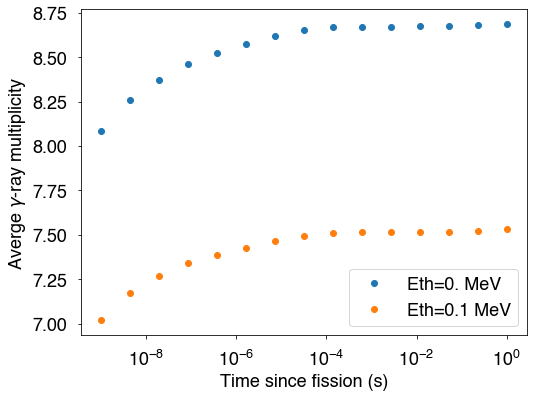

In [8]:
times,nubargTime = hist.nubarg(timeWindow=True) # include timeWindow as a boolean or list of times (in seconds) to activate this feature
fig = plt.figure(figsize=(8,6))
plt.plot(times,nubargTime,'o',label='Eth=0. MeV')
times,nubargTime = hist.nubarg(timeWindow=True,Eth=0.1)
plt.plot(times,nubargTime,'o',label='Eth=0.1 MeV')
plt.xlabel('Time since fission (s)')
plt.ylabel(r'Averge $\gamma$-ray multiplicity')
plt.xscale('log')
plt.legend()
plt.show()

The prompt fission gamma-ray spectrum function, pfgs(), can also be used to calculate this quantity within a certain time window since the fission event. The time window is defined using minTime and maxTime to set the lower and upper boundaries.

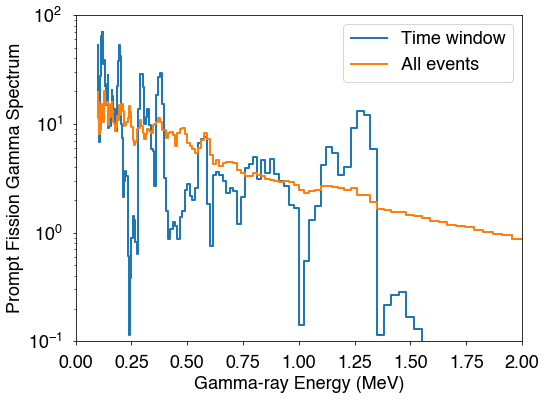

In [9]:
fig = plt.figure(figsize=(8,6))
bE,pfgsTest = hist.pfgs(minTime=5e-8,maxTime=500e-8)
plt.step(bE,pfgsTest,label='Time window')
bE,pfgsTest = hist.pfgs()
plt.step(bE,pfgsTest,label='All events')
plt.yscale('log')
plt.xlim(0,2)
plt.ylim(0.1,100)
plt.xlabel('Gamma-ray Energy (MeV)')
plt.ylabel('Prompt Fission Gamma Spectrum')
plt.legend()
plt.show()

The multiplicity as a function of time can be calculated using the `gammaMultiplicity()` function.  The smoothness of the resulting curve will depend on the number of events included in the history file.  Here, we only have 500,000 events, which is not quite enough for this type of information.

The fission fragment of interest has to be specified (here A=134, Z=52), and a timing window, in seconds, is given from the minTime to the maxTime (here 10 ns to 1000 ns).

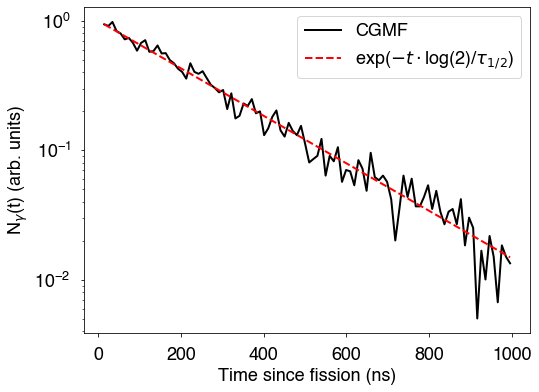

In [10]:
# calculate the gamma-ray multiplicity as a function of time since fission for a specific fission fragment
times,gMultiplicity = hist.gammaMultiplicity(minTime=1e-8,maxTime=1e-6,Afragment=134,Zfragment=52)

# also compare to an exponential decay with the half life of the state
f = np.exp(-times*np.log(2)/1.641e-7) # the half life of 134Te is 164.1 ns
norm = gMultiplicity[0]/f[0]

fig = plt.figure(figsize=(8,6))
plt.plot(times*1e9,gMultiplicity/norm,'k-',label='CGMF')
plt.plot(times*1e9,f,'r--',label=r'exp($-t\cdot$log(2)/$\tau_{1/2}$)')
plt.legend()
plt.yscale('log')
plt.xlabel('Time since fission (ns)')
plt.ylabel(r'N$_\gamma$(t) (arb. units)')
plt.show()

Isomeric ratios can also be calculated with **CGMFtk** with the `isomericRatio()` function.  Again, the fission fragment needs to be specified, along with the spin of the ground state (`Jgs`) and the spin of the isomeric state (`Jm`).  In addition, a threshold time, in seconds, is defined.  This time should be significantly shorter than the lifetime of the state, and one should make sure to check various thershold times to ensure the isomeric ratio is independent of the choice of threshold time.

In [12]:
# calculate the isomeric ratios for specific states in nuclei
# e.g. isomeric ratio for the 1/2- state in 99Nb, ground state is 9/2+, lifetime is 150 s
r = hist.isomericRatio(thresholdTime=1,A=99,Z=41,Jm=0.5,Jgs=4.5)
print ('99Nb:',round(r,2)) 
# e.g. isomeric ratio for the 11/2- state in 133Te, ground state is 3/2+, lifetime is 917.4 s
r = hist.isomericRatio(thresholdTime=1,A=133,Z=52,Jm=5.5,Jgs=1.5)
print ('133Te:',round(r,2))

99Nb: 0.91
133Te: 0.32
